['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
[229.5, 240.0, 248.5, 270.0, 265.0, 248.5, 266.5, 259.0, 272.5, 301.5, 315.0, 345.0]
[206.5, 226.0, 227.5, 245.0, 227.0, 229.5, 240.0, 240.0, 253.0, 273.0, 296.5, 304.0]


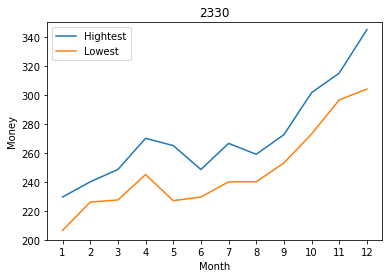

In [85]:
#導入 matplotlib.pyplot為plt
#從bs4 導入 BeautifulSoup
#導入 requests 模組
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np

#宣告month, high, low三個list
month,high,low = [],[],[]
url = 'https://www.twse.com.tw/exchangeReport/FMSRFK?response=html&date=20190101&stockNo=2330'

#使用requests get url
html = requests.get(url)

#使用BeautifulSoup解讀
sp = BeautifulSoup(html.text, 'html.parser')

#抓出table，並存成變數datas
datas = sp.select("table")[0]

#在datas中選擇tbody tr的標籤
data = datas.find_all('td')
data = data[9:]
#print(data[0])
# #使用迴圈找出td，讀取出每個月的資料
# #td的第一個欄位為年份，不管他
# #td的第二個欄位為月份，加入到month list中
# #td的第三個欄位為當月最高價，加入到high list中
# #td的第三個欄位為當月最低價，加入到low list中
month = []
highest = []
lowest = []

for i in range(1, len(data), 9):
    month.append(data[i].text)
for i in range(2, len(data), 9):
    highest.append(float(data[i].text))
for i in range(3, len(data), 9):
    lowest.append(float(data[i].text))

print(month)
print(highest)
print(lowest)
    
# #將圖表顯示出來
plt.plot(month, highest, label='Hightest')
plt.plot(month, lowest, label='Lowest')
plt.legend()

plt.title('2330')
plt.xlabel('Month')
plt.ylabel('Money')
plt.ylim(200, 350)
plt.show()